In [48]:
import pandas as pd
df = pd.read_csv("/content/tweets_covid19_boosterShot.csv")
df

,Unnamed: 0,text,date,user,location
0,0,NEW Dark Angels &amp; Pretty Freaks #Podcast #...,2021-12-05 22:26:40,DAPFpodcast,"Napa, California"
1,1,"@nancy_stanners hi CAROL, yea took a while to ...",2021-12-05 22:22:44,ActivistBowen2,Hong Kong
2,2,Is it a bad sign if your husband starts dancin...,2021-12-05 22:02:45,Emmie12750,Massachusetts
3,3,RT @DrEricDing: Norwegian 🇳🇴 Christmas #Omicro...,2021-12-05 22:02:12,PrinPeta,Pretty island off Australia
4,4,RT @JPfaff1028: Even #BigPharma is admitting t...,2021-12-05 21:59:16,RosemarieMcNern,NaN
...,...,...,...,...,...
2345,2345,"@RaceBannon1260 WILL GET THIS: DECEMBER 13, 20...",2021-11-27 10:33:04,ActivistBowen2,Hong Kong
2346,2346,Booster jab done thank you #nhs #boostershot,2021-11-27 09:56:52,Keefb5,NaN
2347,2347,👍🏼 No vaccine is 100% effective unless every...,2021-11-27 09:51:42,aikeila,Paris
2348,2348,Can a virus mutate in a vaccinated person? Gen...,2021-11-27 09:39:25,phat_controller,"Cornwall, UK"


In [50]:
import pandas as pd

import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)# removing entire twitter handle
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)#removing entire hashtags
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
df['Clean_Tweet'] = df['text'].map(lambda x: cleaner(x))
df['Clean_Tweet'] = df['Clean_Tweet'].str.replace('\d+', '')
df.to_csv("clean.csv")


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [5]:
pip install emoji

     |████████████████████████████████| 170 kB 7.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=720e3003eff389f48403e187850957d36d99ecda112c633c012067a747ee4b5a
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [53]:
df

,Unnamed: 0,text,date,user,location,Clean_Tweet
0,0,NEW Dark Angels &amp; Pretty Freaks #Podcast #...,2021-12-05 22:26:40,DAPFpodcast,"Napa, California",NEW Dark & ; Pretty “ She Is Creepy ” Married...
1,1,"@nancy_stanners hi CAROL, yea took a while to ...",2021-12-05 22:22:44,ActivistBowen2,Hong Kong,"hi CAROL , yea took a while to get this appoin..."
2,2,Is it a bad sign if your husband starts dancin...,2021-12-05 22:02:45,Emmie12750,Massachusetts,Is it a bad sign if your husband dancing to mu...
3,3,RT @DrEricDing: Norwegian 🇳🇴 Christmas #Omicro...,2021-12-05 22:02:12,PrinPeta,Pretty island off Australia,: 🇳🇴 Omicron party …. That work outbreak is no...
4,4,RT @JPfaff1028: Even #BigPharma is admitting t...,2021-12-05 21:59:16,RosemarieMcNern,NaN,": Even is these are useless against the new , ..."
...,...,...,...,...,...,...
2345,2345,"@RaceBannon1260 WILL GET THIS: DECEMBER 13, 20...",2021-11-27 10:33:04,ActivistBowen2,Hong Kong,"WILL GET THIS : , BOOSTER"
2346,2346,Booster jab done thank you #nhs #boostershot,2021-11-27 09:56:52,Keefb5,NaN,Booster jab done thank you
2347,2347,👍🏼 No vaccine is 100% effective unless every...,2021-11-27 09:51:42,aikeila,Paris,👍🏼 No vaccine is % effective unless everyone ...
2348,2348,Can a virus mutate in a vaccinated person? Gen...,2021-11-27 09:39:25,phat_controller,"Cornwall, UK",Can a virus mutate in a person ? Genuine quest...


In [54]:
df=df[['Clean_Tweet']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (2350, 1)


,Clean_Tweet
0,NEW Dark & ; Pretty “ She Is Creepy ” Married...
1,"hi CAROL , yea took a while to get this appoin..."
2,Is it a bad sign if your husband dancing to mu...
3,: 🇳🇴 Omicron party …. That work outbreak is no...
4,": Even is these are useless against the new , ..."


In [55]:
df.isnull().sum()

Clean_Tweet    0
dtype: int64

In [56]:
df.dropna(inplace=True)
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Clean_Tweet    0
dtype: int64

In [57]:
df['cleaned']=df['Clean_Tweet'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
df['cleaned'] = df['cleaned'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
import string
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df

,Clean_Tweet,cleaned
0,NEW Dark & ; Pretty “ She Is Creepy ” Married...,new dark pretty she is creepy married chatting...
1,"hi CAROL , yea took a while to get this appoin...",hi carol yea took a while to get this appointm...
2,Is it a bad sign if your husband dancing to mu...,is it a bad sign if your husband dancing to mu...
3,: 🇳🇴 Omicron party …. That work outbreak is no...,omicron party that work outbreak is now up to...
4,": Even is these are useless against the new , ...",even is these are useless against the new yet...
...,...,...
2345,"WILL GET THIS : , BOOSTER",will get this booster
2346,Booster jab done thank you,booster jab done thank you
2347,👍🏼 No vaccine is % effective unless everyone ...,no vaccine is effective unless everyone is
2348,Can a virus mutate in a person ? Genuine quest...,can a virus mutate in a person genuine questio...


In [63]:

for index,cleaned in enumerate(df['cleaned'][35:40]):
  print('Tweet %d:\n'%(index+1),cleaned)

Tweet 1:
  omicron party that work outbreak is now up to out of testing covid 
Tweet 2:
 omicron may not have anyone yet but do people realize just how a few of them were for a day or so 
Tweet 3:
  omicron party that work outbreak is now up to out of testing covid 
Tweet 4:
  omicron party that work outbreak is now up to out of testing covid 
Tweet 5:
 everyone who now the booster shot should get a free lolly pop booster


In [65]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['cleaned'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    new dark pretti she is creepi marri chat about...
1    hi carol yea took a while to get thi appoint y...
2    is it a bad sign if your husband danc to music...
3    omicron parti that work outbreak is now up to ...
4    even is these are useless against the new yet ...
Name: cleaned, dtype: object

In [68]:
df['cleaned'] = df['cleaned'].str.replace('[^\w\s]', '')
df['cleaned'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    new dark pretti she is creepi marri chat about...
1    hi carol yea took a while to get thi appoint y...
2    is it a bad sign if your husband danc to music...
3    omicron parti that work outbreak is now up to ...
4    even is these are useless against the new yet ...
Name: cleaned, dtype: object

In [69]:
df['tweet_len'] = df['cleaned'].astype(str).apply(len)
df['word_count'] = df['cleaned'].apply(lambda x: len(str(x).split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['thi','new','get','like','give', 'go','make','one','whi','hi','use','need','wa','plea','see','got','look','hey','ani','say','tri','still','come']
stopwords.extend(newStopWords)
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df['cleaned'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    dark pretti creepi marri chat life unedit
1             carol yea took appoint know send
2                  bad sign husband danc music
3       omicron parti work outbreak test covid
4           even useless yet onli solut mandat
Name: cleaned, dtype: object

In [71]:
from textblob import TextBlob, Word
df['polarity'] = df['cleaned'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Clean_Tweet,cleaned,tweet_len,word_count,polarity
0,NEW Dark & ; Pretty “ She Is Creepy ” Married...,dark pretti creepi marri chat life unedit,58,11,-0.15
1,"hi CAROL , yea took a while to get this appoin...",carol yea took appoint know send,73,17,0.00
2,Is it a bad sign if your husband dancing to mu...,bad sign husband danc music,58,14,-0.70
3,: 🇳🇴 Omicron party …. That work outbreak is no...,omicron parti work outbreak test covid,63,13,0.00
4,": Even is these are useless against the new , ...",even useless yet onli solut mandat,76,16,-0.50


In [72]:
cleantext = " ".join(cleaned for cleaned in df.cleaned)

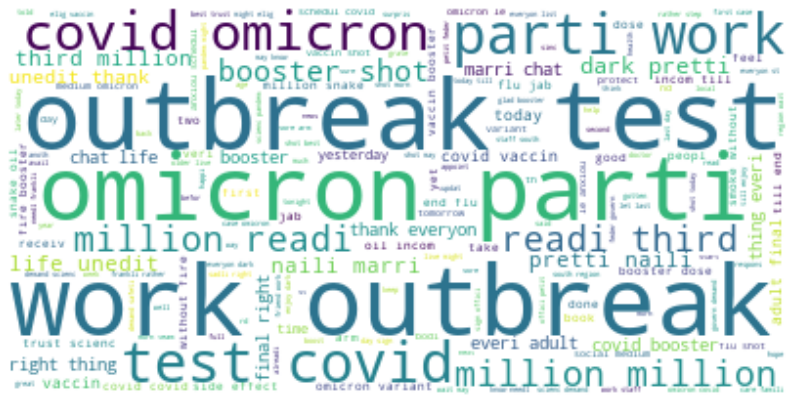

In [75]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(cleantext)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['cleaned'], 20)
df1 = pd.DataFrame(common_words, columns = ['cleaned', 'count'])
df1

,cleaned,count
0,covid,954
1,omicron,718
2,work,612
3,test,582
4,outbreak,571
5,parti,570
6,booster,411
7,million,396
8,vaccin,223
9,shot,211


In [77]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['cleaned'], 30)
df2 = pd.DataFrame(common_words2, columns=['cleaned', "Count"])
df2.head()

,cleaned,Count
0,work outbreak,571
1,outbreak test,571
2,omicron parti,570
3,parti work,570
4,test covid,570


In [78]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['cleaned'], 30)
df3 = pd.DataFrame(common_words3, columns = ['cleaned' , 'Count'])
df3

,cleaned,Count
0,work outbreak test,571
1,omicron parti work,570
2,parti work outbreak,570
3,outbreak test covid,570
4,million million readi,177
5,dark pretti naili,110
6,pretti naili marri,110
7,life unedit thank,100
8,unedit thank everyon,100
9,marri chat life,99


In [79]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [80]:
blob = TextBlob(str(df['cleaned']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]

In [81]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [82]:
df_grouped=df[['cleaned','lemmatized']].groupby(by='cleaned').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
cleaned,
,...
abl third covid jab govern scientif advisori bodi said,abl covid jab govern scientif advisori bodi say
absolut trigger photo press know exactli r asylum statu,absolut trigger photo press know exactli r asy...
account vaccin pioneer covid n,account vaccin pioneer covid n
activ work public plu galor crow,activ work public plu galor crow


In [83]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abil,abl,abov,abroad,absolut,access,account,ach,achi,achiev,acquir,activ,actual,ad,adag,addit,adequ,administ,administr,adult,advanc,advic,advis,advisori,aft,afternoon,afterward,aga,age,agenc,ago,ahead,aid,air,aka,al,albeit,alert,allgood,allow,...,wear,wee,week,weekend,welcom,well,whatev,whew,white,wi,wide,win,winner,winter,wise,wish,woke,wonder,wor,word,work,workout,world,worri,worth,wow,wright,ya,ye,yea,yeah,year,yearli,yesterday,york,yr,zac,zero,zombi,zoom
cleaned,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abl third covid jab govern scientif advisori bodi said,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
absolut trigger photo press know exactli r asylum statu,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [85]:
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['cleaned']):
  print('Review {}:\n'.format(index+1),review)

Review 1:
 first confirm case u great time
Review 2:
 booster done scienc win bless kaiser
Review 3:
 g boost yesterday feel great might tremend


In [86]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['cleaned']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 sorri booster shot vaccin feel real bad slept day woke complet
Review 2:
 sorri booster shot vaccin feel real bad slept day woke complet
Review 3:
 sorri booster shot vaccin feel real bad slept day woke complet


In [87]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df

,Clean_Tweet,cleaned,tweet_len,word_count,polarity,lemmatized
0,NEW Dark & ; Pretty “ She Is Creepy ” Married...,dark pretti creepi marri chat life unedit,58,7,-0.15,dark pretti creepi marri chat life unedit
1,"hi CAROL , yea took a while to get this appoin...",carol yea took appoint know send,73,6,0.00,carol yea take appoint know send
2,Is it a bad sign if your husband dancing to mu...,bad sign husband danc music,58,5,-0.70,bad sign husband danc music
3,: 🇳🇴 Omicron party …. That work outbreak is no...,omicron parti work outbreak test covid,63,6,0.00,omicron parti work outbreak test covid
4,": Even is these are useless against the new , ...",even useless yet onli solut mandat,76,4,-0.50,useless onli solut mandat
...,...,...,...,...,...,...
2345,"WILL GET THIS : , BOOSTER",booster,20,1,0.00,booster
2346,Booster jab done thank you,booster jab done thank,26,3,0.00,booster jab thank
2347,👍🏼 No vaccine is % effective unless everyone ...,vaccin effect unless everyon,37,3,0.00,vaccin effect everyon
2348,Can a virus mutate in a person ? Genuine quest...,viru mutat person genuin question covid covid ...,62,8,0.00,viru mutat person genuin question covid covid ...


In [88]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(cleaned):
    return TextBlob(cleaned).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(cleaned):
        return TextBlob(cleaned).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [89]:
fin_data = pd.DataFrame(df[['cleaned', 'lemmatized']])

In [91]:
df['Subjectivity'] = df['lemmatized'].apply(getSubjectivity) 
df['Polarity'] = df['lemmatized'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df

,Clean_Tweet,cleaned,tweet_len,word_count,polarity,lemmatized,Subjectivity,Polarity,Analysis
0,NEW Dark & ; Pretty “ She Is Creepy ” Married...,dark pretti creepi marri chat life unedit,58,7,-0.15,dark pretti creepi marri chat life unedit,0.400000,-0.15,Negative
1,"hi CAROL , yea took a while to get this appoin...",carol yea took appoint know send,73,6,0.00,carol yea take appoint know send,0.000000,0.00,Neutral
2,Is it a bad sign if your husband dancing to mu...,bad sign husband danc music,58,5,-0.70,bad sign husband danc music,0.666667,-0.70,Negative
3,: 🇳🇴 Omicron party …. That work outbreak is no...,omicron parti work outbreak test covid,63,6,0.00,omicron parti work outbreak test covid,0.000000,0.00,Neutral
4,": Even is these are useless against the new , ...",even useless yet onli solut mandat,76,4,-0.50,useless onli solut mandat,0.200000,-0.50,Negative
...,...,...,...,...,...,...,...,...,...
2345,"WILL GET THIS : , BOOSTER",booster,20,1,0.00,booster,0.000000,0.00,Neutral
2346,Booster jab done thank you,booster jab done thank,26,3,0.00,booster jab thank,0.000000,0.00,Neutral
2347,👍🏼 No vaccine is % effective unless everyone ...,vaccin effect unless everyon,37,3,0.00,vaccin effect everyon,0.000000,0.00,Neutral
2348,Can a virus mutate in a person ? Genuine quest...,viru mutat person genuin question covid covid ...,62,8,0.00,viru mutat person genuin question covid covid ...,0.000000,0.00,Neutral


In [92]:
tb_counts = df.Analysis.value_counts()

tb_counts

Neutral     1757
Positive     390
Negative     203
Name: Analysis, dtype: int64

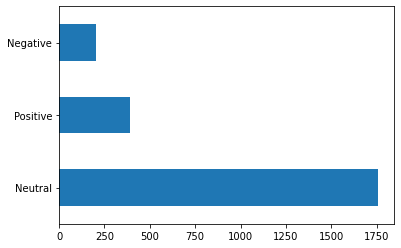

In [93]:
df.Analysis.value_counts().plot(kind='barh')